In [1]:
from GCM2ExoTransmit import *
import matplotlib.gridspec as gridspec
%matplotlib inline

In [33]:
# get spectra from layers and GCM data
simname = 'earth'
layerdirs = np.sort(np.array(glob.glob('../Exo_Transmit/Spectra/GCM/terminator/%s_layer*'%simname)))
time,lon,lat,h,Ps,P,T,X_H2O,clouds = get_GCM_data('plasim_samples/%s.nc'%simname)
Ntime, Nh, Nlat, Nlon = T.shape
assert layerdirs.size == Nh
tindex = 11
cloudP = 5e3

In [14]:
# get averge termintor water vapour in each layer
X_H2Oavg = np.zeros(Nh)
for h in range(Nh):
    X_H2Otmp = np.zeros(0)
    for i in range(Nlat):
        for j in range(Nlon):
            if at_terminator(lat[i], lon[j]):
                X_H2Otmp = np.append(X_H2Otmp, X_H2O[tindex,h,i,j])
    X_H2Oavg[h] = X_H2Otmp.mean()

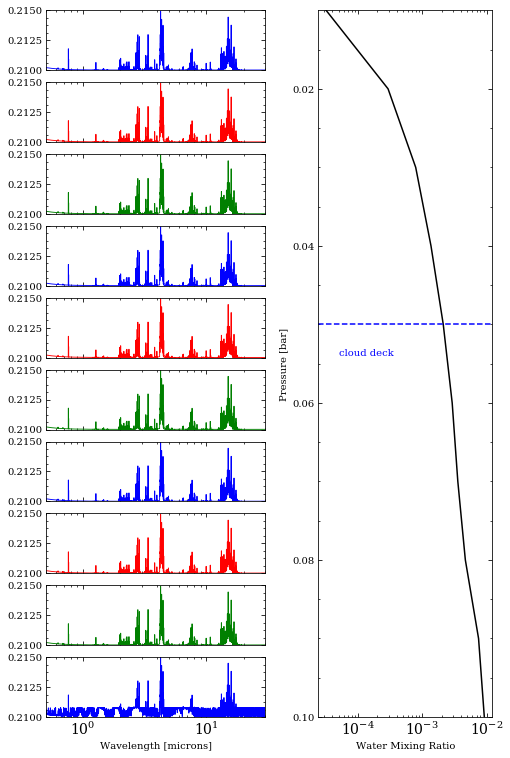

In [77]:
# plot transmission in layers and water content
plt.figure(figsize=(8,13))
gs = gridspec.GridSpec(Nh,10)

# plot water
axX = plt.subplot(gs[:,-4:])
axX.plot(X_H2Oavg, P*1e-5, 'k-'), axX.set_ylim((P.max()*1e-5,P.min()*1e-5))
axX.axhline(cloudP*1e-5, ls='--', c='b'), axX.text(5e-5, cloudP*1e-5+4e-3, 'cloud deck', color='b')
axX.set_xscale('log'), axX.set_xlabel('Water Mixing Ratio'), axX.set_ylabel('Pressure [bar]')

# plot transmission spectra
cols = ['b','r','g']*4
for i in range(Nh):
    wl, spec = np.loadtxt('%s/earth_layer%i.dat'%(layerdirs[i],i)).T
    wl *= 1e6
    ax = plt.subplot(gs[i,:-5])
    ax.plot(wl, spec, '%s-'%cols[i], lw=.9)
    ax.set_xscale('log'), ax.set_xlim((.5,30)), ax.set_ylim((.21,.215))
    if i != Nh-1:
        ax.set_xticklabels('')
    else:
        ax.set_xlabel('Wavelength [microns]')

## temp

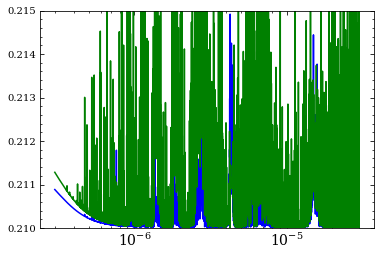

In [81]:
wl0, spec0 = np.loadtxt('../Exo_Transmit/Spectra/GCM/terminator/earth/earth.dat').T
wl1, spec1 = np.loadtxt('../Exo_Transmit/Spectra/GCM/terminator/earth_cloud5e3_layer0/earth_cloud5e3_layer0.dat').T

plt.plot(wl0, spec0, '-'), plt.xscale('log'), plt.ylim((.21,.215))
plt.plot(wl1, spec1, '-')

In [63]:
spec1==spec0

array([ True,  True,  True, ...,  True,  True,  True])